**Transfer Learning with VGG16**

In [ ]:
from sklearn.datasets import fetch_openml 

import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# load data 
loaded_images_train = np.load('/content/drive/My Drive/Kaggle/Images_test.npy') 
loaded_labels_train = np.load('/content/drive/My Drive/Kaggle/Labels_test.npy') 
print(loaded_images_train.shape)
print(loaded_labels_train.shape)

(14034, 150, 150, 3)
(14034,)


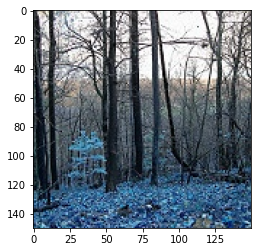

In [ ]:
from random import randint
rnd_number = randint(0,len(loaded_labels_train))
plt.imshow(loaded_images_train[rnd_number])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(loaded_images_train, loaded_labels_train, test_size = 1/6, random_state = 42 )
print(X_train.shape, X_val.shape)
print(y_train, y_val)

(11695, 150, 150, 3) (2339, 150, 150, 3)
[5 5 5 ... 0 5 1] [4 3 0 ... 1 5 2]


In [ ]:
pwd

'/content'

In [ ]:
from tensorflow.keras.applications import VGG16
pretrained_model = VGG16(input_shape = (150,150,3), include_top = False, weights = 'imagenet') # pretrained resnet from imagenet

for layer in pretrained_model.layers:
  layer.trainable = False; # do not train pretrained network 

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
from tensorflow.keras.optimizers import SGD


from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout


#custom layers
flat1= Flatten()(pretrained_model.layers[-1].output)
class1= Dense(300, activation = 'relu')(flat1)
drop1= Dropout(0.2)(class1)
output = Dense(6,activation = 'softmax')(drop1)

model_VGG16 = Model(pretrained_model.input, output)

sgd = SGD(learning_rate = 0.01)

model_VGG16.compile(optimizer = sgd, 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])


In [ ]:
model_VGG16.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)      

In [ ]:

X_train = X_train.astype('float32')/255.0
y_train = y_train.astype('uint')
X_val   = X_val.astype('float32')/255.0
y_val   = y_val.astype('uint')

model_VGG16.fit(X_train,y_train, batch_size=32, epochs = 3, validation_data=(X_val,y_val))

Epoch 1/3
366/366 [==============================] - 2987s 8s/step - loss: 0.7364 - accuracy: 0.7235 - val_loss: 0.6448 - val_accuracy: 0.7349
Epoch 2/3
366/366 [==============================] - 2988s 8s/step - loss: 0.4487 - accuracy: 0.8359 - val_loss: 0.4102 - val_accuracy: 0.8508
Epoch 3/3
366/366 [==============================] - 2993s 8s/step - loss: 0.3963 - accuracy: 0.8555 - val_loss: 0.4049 - val_accuracy: 0.8495


In [ ]:
!mkdir -p saved_model
model_VGG16.save('saved_model/intel_vgg16') 

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/intel_vgg16/assets


In [ ]:
#load test data 
loaded_images_test = np.load('/content/drive/My Drive/Kaggle/Images_train.npy') 
loaded_labels_test = np.load('/content/drive/My Drive/Kaggle/Labels_train.npy') 

**TEST ACCURACY**

In [ ]:
#inference 
X_test = loaded_images_test.astype('float32')/255.0
y_test = loaded_labels_test.astype('uint')

loss, acc = model_VGG16.evaluate(X_test,y_test, verbose = 0)
print('Accuracy: %.3f' % acc)

Accuracy: 0.839
